In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd


import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

import datetime
import json 


In [9]:
## 가장 많이 사용되어지는 장르 빈도수 함수
def get_nlkt_text(df_genres) :

    genres_all=[]

    for df in df_genres :
        genres_all.append( list(map(lambda x : x.strip(''), df.split(','))) )

    genres_all = sum(genres_all, [])
    tokens_genres = [word for word in genres_all if word not in '']
    text = nltk.Text(tokens_genres) # nltk 

    return text

In [11]:
## 그래프 그려주는 함수
def make_top_word_graph( topWord ):
    xlist = [a[0] for a in topWord ]
    ylist = [a[1] for a in topWord]
    
    plt.figure(0)
    count = 10
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    
    rc('font', family=font_name) # 한글 적용

    plt.xlabel('Word')
    plt.xticks(rotation=70) # x축 라벨 회전
    plt.ylabel('Count')
    plt.title('keyword' +' TOP '+str(count)+' WORD')
   
    plt.plot(xlist,ylist)
    plt.savefig('top-word-graph.png', dpi=400)
    

In [14]:
# list tuple을 딕셔너리로 만들어주는 함수
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[list_tuple[i][0]] = list_tuple[i][1]
    return todict
#wordcloud 시각화 그래프 
def wordcloud_graph(topWord) :
    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                          relative_scaling = 0.2,
                          background_color='white',
                          ).generate_from_frequencies( todict(topWord) )

    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [4]:
#크롤링 중 아래로 스크롤 하는 함수 
def doScrollDown(driver, whileSeconds):
    start = datetime.datetime.now()
    end = start + datetime.timedelta(seconds=whileSeconds)
    while True:
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        time.sleep(1)
        if datetime.datetime.now() > end:
            break

### Neflix  

In [2]:
#Step 1. 크롬 웹브라우저 실행
path = "D:\Python\TM\drivers\chromedriver.exe"

driver = webdriver.Chrome(r"D:\Python\TM\drivers\chromedriver.exe")
# 사이트 주소는 넷플릭스 대표프로그램 url
driver.get('https://www.netflix.com/kr/browse/genre/839338')
time.sleep(2)



#Step2. 넷플릭스 단독 프로그램 대상 조회, ( 제목, 장르, 상세주소를 가져옴)
soups = BeautifulSoup(driver.page_source, "lxml") 
contents = soups.findAll("a", attrs={"class":"nm-collections-title nm-collections-link"})

netfilx_dict={}

for i,x in enumerate(contents) :
    if i >= 100 :
        break;
        
    row_dict={}
    row_dict["TITLE"] = x.get_text()
    row_dict["LINK"] = x["href"]
    
    try :
        url =  x["href"]
        driver.get(url)
        time.sleep(2)

        soups = BeautifulSoup(driver.page_source, "lxml") 
        genres = soups.findAll("a", attrs={"class":"more-details-item item-genres"})
        genres_all=''
        for x in genres :
            genres_all += x.get_text() + ","   
        row_dict["GENRES"] = genres_all
        netfilx_dict[i] = row_dict

    except:
        driver.close()
        time.sleep(1)
        
        driver = webdriver.Chrome(r"D:\Python\TM\drivers\chromedriver.exe")
        
        continue


driver.close()

#Step3. pandas 형태로 변형
netfilx_df = pd.DataFrame.from_dict(netfilx_dict, 'index')
print(netfilx_df)

#Step4. 콘텐츠 목록 저장
netfilx_df.to_excel(r"D:\Python\TM\TeamProject/netflix_contents.xlsx")


<ipython-input-2-98adb1e38749>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"D:\Python\TM\drivers\chromedriver.exe")


                  TITLE                                       LINK  \
0                    지옥  https://www.netflix.com/kr/title/81256675   
1                오징어 게임  https://www.netflix.com/kr/title/81040344   
2                   아케인  https://www.netflix.com/kr/title/81435684   
3                  D.P.  https://www.netflix.com/kr/title/81280917   
4                 마이 네임  https://www.netflix.com/kr/title/81011211   
..                  ...                                        ...   
95            알렉사 & 케이티  https://www.netflix.com/kr/title/80174285   
96  스폰지밥 무비: 핑핑이 구출 대작전  https://www.netflix.com/kr/title/81312563   
97                   힐다  https://www.netflix.com/kr/title/80115346   
98              오싹한 이야기  https://www.netflix.com/kr/title/80214792   
99              멸종은 싫어!  https://www.netflix.com/kr/title/81159137   

                                               GENRES  
0   TV 프로그램·미스터리,TV 프로그램·범죄,한국 드라마,TV 프로그램·스릴러,TV ...  
1                          한국 드라마,TV 프로그램·스릴러,T

In [3]:
netfilx_df

,TITLE,LINK,GENRES
0,지옥,https://www.netflix.com/kr/title/81256675,"TV 프로그램·미스터리,TV 프로그램·범죄,한국 드라마,TV 프로그램·스릴러,TV ..."
1,오징어 게임,https://www.netflix.com/kr/title/81040344,"한국 드라마,TV 프로그램·스릴러,TV 드라마,"
2,아케인,https://www.netflix.com/kr/title/81435684,"TV 프로그램·판타지,미국 TV 프로그램,TV 프로그램·액션 & 어드벤처,"
3,D.P.,https://www.netflix.com/kr/title/81280917,"한국 드라마,TV 드라마,"
4,마이 네임,https://www.netflix.com/kr/title/81011211,"TV 프로그램·범죄,한국 드라마,TV 프로그램·스릴러,TV 프로그램·액션 & 어드벤처,"
...,...,...,...
95,알렉사 & 케이티,https://www.netflix.com/kr/title/80174285,"TV 프로그램·키즈,시트콤,TV 프로그램·코미디,"
96,스폰지밥 무비: 핑핑이 구출 대작전,https://www.netflix.com/kr/title/81312563,"가족 영화,미국 영화,코미디,영화·어린이 & 가족,"
97,힐다,https://www.netflix.com/kr/title/80115346,"TV 프로그램·키즈,TV 만화,"
98,오싹한 이야기,https://www.netflix.com/kr/title/80214792,"TV 프로그램·키즈,"


In [7]:

netflix_text = get_nlkt_text(df_genres) 

topWord = netflix_text.vocab().most_common(10) # top n word 
print(topWord)


[('TV 드라마', 44), ('미국 TV 프로그램', 35), ('도서 원작 TV 프로그램', 23), ('TV 프로그램·스릴러', 19), ('TV 프로그램·액션 & 어드벤처', 19), ('TV 프로그램·키즈', 15), ('TV 프로그램·판타지', 14), ('TV 프로그램·범죄', 12), ('TV 프로그램·코미디', 12), ('TV 프로그램·10대', 11)]


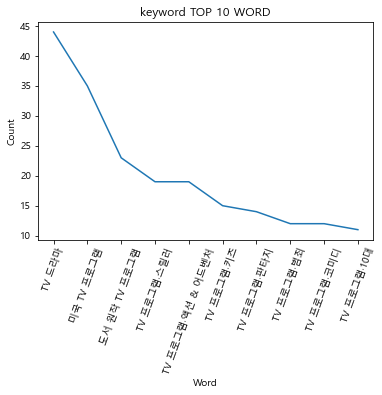

In [9]:
make_top_word_graph(topWord)

In [10]:
type(text.vocab().most_common(30))
# list => tuple
print(dict(map(reversed,text.vocab().most_common(30))))

{44: 'TV 드라마', 35: '미국 TV 프로그램', 23: '도서 원작 TV 프로그램', 19: 'TV 프로그램·액션 & 어드벤처', 15: 'TV 프로그램·키즈', 14: 'TV 프로그램·판타지', 12: 'TV 프로그램·코미디', 11: 'TV 프로그램·10대', 10: '한국 드라마', 9: 'TV 프로그램·미스터리', 7: '영화·어린이 & 가족', 5: '코미디', 4: '애니메이션 시리즈', 3: '다큐멘터리·역사', 2: '시트콤', 1: '영화·도서 원작'}


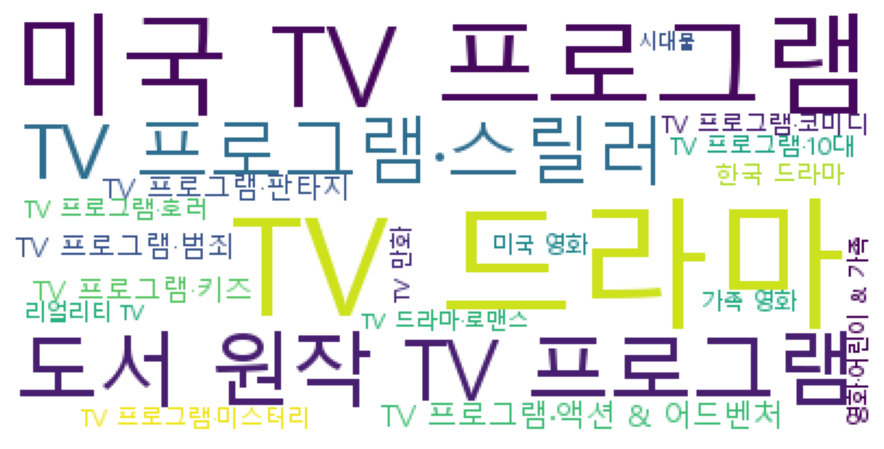

In [12]:
wordcloud_graph(text.vocab().most_common(20))

### 왓챠 

In [14]:
#Step 1. 크롬 웹브라우저 실행
path = "D:\Python\TM\drivers\chromedriver.exe"

driver = webdriver.Chrome(r"D:\Python\TM\drivers\chromedriver.exe")
# 사이트 주소는 왓챠  대표프로그램 url
driver.get('https://watcha.com/staffmades/409')
time.sleep(2)

doScrollDown(driver,7)

#Step2. 왓챠  단독 프로그램 대상 조회, ( 제목, 장르, 상세주소를 가져옴)
soups = BeautifulSoup(driver.page_source, "lxml") 
contents = soups.findAll("script", attrs={"type":"application/ld+json"})

watcha_dict={}

watcha_json = json.loads(contents[0].text) 
watcha_dict={}
i = 0 
for d in   watcha_json["itemListElement"] :
 
    if i>=100:
        break;
    if d.get("item") :
        x = d.get("item")
        row_dict ={}
        if x.get("@type") == 'Movie' :
            row_dict['TITLE'] = x.get('name')
            row_dict['LINK'] = x.get('url')
            try :
                driver.get(x.get('url'))
                time.sleep(2)
             
                soups = BeautifulSoup(driver.page_source, "lxml") 
                genres = soups.find("script", attrs={"type":"application/ld+json"})
                genres_json = json.loads(genres.text)
                row_dict["GENRES"] = genres_json.get('genre')
                watcha_dict[i] = row_dict
                
                i+=1
            except:
                driver.close()
                time.sleep(1)
                
                driver = webdriver.Chrome(r"D:\Python\TM\drivers\chromedriver.exe")
                
                continue
            

driver.close()
#Step3. pandas 형태로 변형
watcha_df = pd.DataFrame.from_dict(watcha_dict, 'index')
print(watcha_df)

#Step4. 콘텐츠 목록 저장
watcha_df.to_excel(r"D:\Python\TM\TeamProject/watcha_contents.xlsx")

<ipython-input-14-4e4b03b16a26>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"D:\Python\TM\drivers\chromedriver.exe")


                        TITLE                                       LINK  \
0                채플웨이트: 피의 저택  https://watcha.com/ko-KR/contents/tPDOdmo   
1                          도굴  https://watcha.com/ko-KR/contents/mO1jn9Q   
2             더듬이TV: 우당탕탕 안테나  https://watcha.com/ko-KR/contents/tRp4MDe   
3                      왕좌의 게임  https://watcha.com/ko-KR/contents/tRB0Xql   
4                    거침없이 하이킥  https://watcha.com/ko-KR/contents/tlGmjZR   
..                        ...                                        ...   
95                    제빵왕 김탁구  https://watcha.com/ko-KR/contents/t8E6Qql   
96                        백두산  https://watcha.com/ko-KR/contents/m5X2Mlz   
97                   아머드 사우루스  https://watcha.com/ko-KR/contents/tlGNyg4   
98             달의 연인 - 보보경심 려  https://watcha.com/ko-KR/contents/tR48YwR   
99  극장판 짱구는 못말려 9기: 어른 제국의 역습  https://watcha.com/ko-KR/contents/m5rQ8bd   

                     GENRES  
0         드라마,공포,미스터리,TV드라마  
1                        범죄

[('드라마', 57), ('TV드라마', 51), ('로맨스', 29), ('판타지', 27), ('코미디', 24), ('모험', 23), ('액션', 21), ('미스터리', 18), ('애니메이션', 16), ('스릴러', 12)]


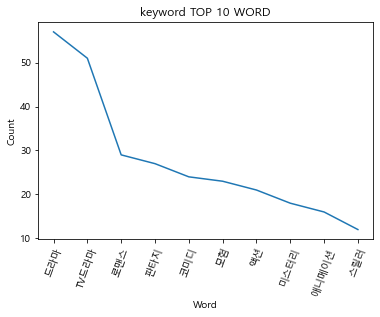

In [15]:
df_genres = watcha_df['GENRES']
watcha_text = get_nlkt_text(df_genres)
topWord = watcha_text.vocab().most_common(10) # top n word 
print(topWord)
make_top_word_graph(topWord)

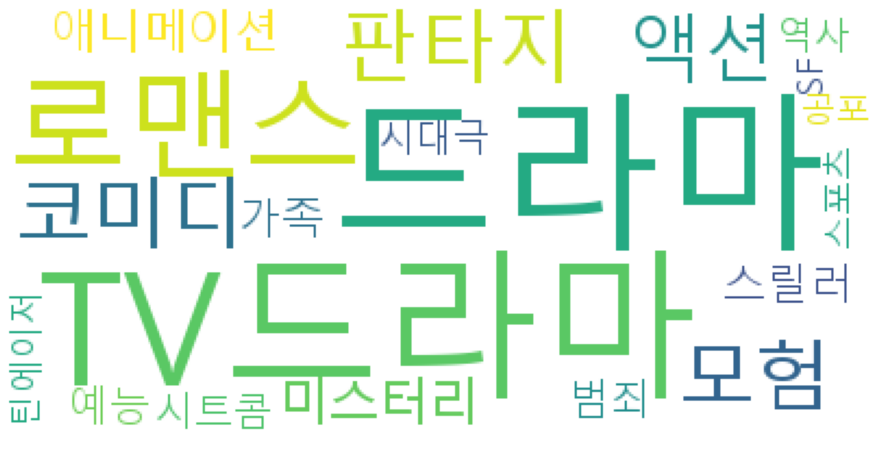

In [16]:
wordcloud_graph(watcha_text.vocab().most_common(20))

### 티빙

In [7]:
#Step 1. 크롬 웹브라우저 실행
path = "D:\Python\TM\drivers\chromedriver.exe"

driver = webdriver.Chrome(r"D:\Python\TM\drivers\chromedriver.exe")
# 사이트 주소는 티빙  대표프로그램 url
driver.get('https://www.tving.com/vod/popular')
time.sleep(2)

doScrollDown(driver,5)

#Step2. 티빙  단독 프로그램 대상 조회, ( 제목, 장르, 상세주소를 가져옴)
soups = BeautifulSoup(driver.page_source, "lxml") 
contents = soups.findAll("a", attrs={"class":"program-item__info-title"})
tiving_dict={}
i=0

for x in contents :
    if i >= 100 :
        break;
    
    
    row_dict={}
    row_dict["TITLE"] = x.get_text().strip()
    row_dict["LINK"] ="https://www.tving.com"+ x["href"]
    
    try : 

        url ="https://www.tving.com"+ x["href"]
        driver.get(url)
        time.sleep(2)

        soups = BeautifulSoup(driver.page_source, "lxml") 
        #genres = soups.find("a", attrs={"class":"under"})
        #genres=genres.get_text().strip()
        
        genres = soups.findAll("script", attrs={"type":"text/javascript"})
        json_soup = str(genres[29]).split('body :')[1].split(";")[0]
        json_soup=json_soup.replace("\n",'').strip()
        json_soup = json_soup[:len(json_soup)-2]

        json_Data = json.loads(json_soup)
        genres = json_Data["program"]["category1_name"]["ko"] +"," +  json_Data["program"]["category2_name"]["ko"]
        #print(genres )
        
        row_dict["GENRES"] = genres
        tiving_dict[i] = row_dict
        i+=1

    except:
        driver.close()
        time.sleep(1)
        
        driver = webdriver.Chrome(r"D:\Python\TM\drivers\chromedriver.exe")
        
        continue
    
    


#Step3. pandas 형태로 변형
driver.close()
tiving_df = pd.DataFrame.from_dict(tiving_dict, 'index')
print(tiving_df)

#Step4. 콘텐츠 목록 저장
tiving_df.to_excel(r"D:\Python\TM\TeamProject/tiving_contents.xlsx")

<ipython-input-7-8bf49ad20929>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"D:\Python\TM\drivers\chromedriver.exe")
<ipython-input-7-8bf49ad20929>:53: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"D:\Python\TM\drivers\chromedriver.exe")


                    TITLE                                         LINK  \
0             [무삭제판] 해피니스  https://www.tving.com/vod/player/P001528426   
1               러브캐처 인 서울  https://www.tving.com/vod/player/P001521836   
2            스트릿댄스 걸스 파이터  https://www.tving.com/vod/player/P001539425   
3                 엄마는 아이돌  https://www.tving.com/vod/player/P001541115   
4             유 퀴즈 온 더 블럭  https://www.tving.com/vod/player/P000643144   
..                    ...                                          ...   
95  스트릿 우먼 파이터 첫 탈락팀 비하인드  https://www.tving.com/vod/player/P001513858   
96                골프왕 시즌2  https://www.tving.com/vod/player/P001519671   
97                 신서유기 7  https://www.tving.com/vod/player/P001052050   
98              응답하라 1994  https://www.tving.com/vod/player/P000120061   
99                사랑의 불시착  https://www.tving.com/vod/player/P001096961   

       GENRES  
0     드라마,로맨스  
1   예능,관찰리얼리티  
2    예능,버라이어티  
3    예능,버라이어티  
4      예능,토크쇼  
..        ...  

[('예능', 63), ('버라이어티', 24), ('드라마', 22), ('로맨스', 11), ('음악예능', 9), ('관찰리얼리티', 7), ('애니메이션', 6), ('키즈', 5), ('토크쇼', 4), ('스포츠 예능', 4)]


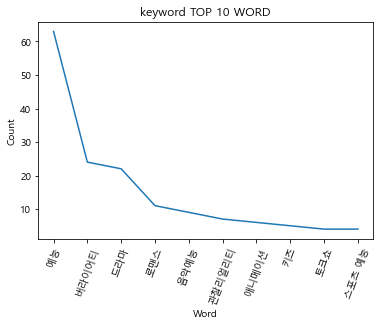

In [12]:
df_genres = tiving_df['GENRES']
tiving_text = get_nlkt_text(df_genres)
topWord = tiving_text.vocab().most_common(10) # top n word 
print(topWord)
make_top_word_graph(topWord)

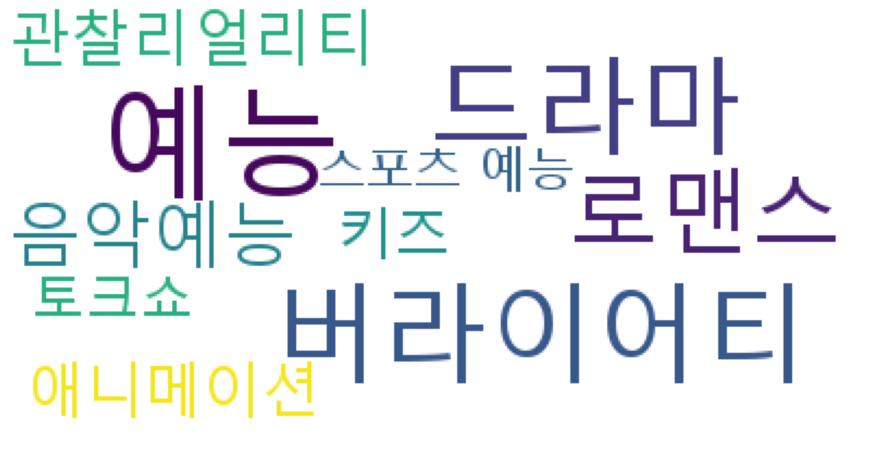

In [15]:
wordcloud_graph(topWord)

In [20]:
tiving_df

,TITLE,LINK,GENRES
0,스트릿댄스 걸스 파이터,https://www.tving.com/vod/player/P001539425,예능
1,유 퀴즈 온 더 블럭,https://www.tving.com/vod/player/P000643144,예능
2,멜랑꼴리아,https://www.tving.com/vod/player/P001525969,드라마
3,술꾼도시여자들,https://www.tving.com/vod/player/P001518829,드라마
4,너를 닮은 사람,https://www.tving.com/vod/player/P001518011,드라마
...,...,...,...
95,간 떨어지는 동거,https://www.tving.com/vod/player/P001471948,드라마
96,사랑의 불시착,https://www.tving.com/vod/player/P001096961,드라마
97,38 사기동대,https://www.tving.com/vod/player/P000288116,드라마
98,헬로 트로트,https://www.tving.com/vod/player/P001531117,예능


### 디즈니플러스

In [16]:
disneyplus_df = pd.read_excel('디즈니플러스.xlsx')

In [17]:
disneyplus_df.apply 

<bound method DataFrame.apply of                     TITLE      GENRES
0                   만달로리안    스페이스 오페라
1                  필사의 도전      역사 드라마
2                    완다비전  슈퍼히어로, 시트콤
3               팔콘과 윈터 솔져   슈퍼히어로, 액션
4                      로키  슈퍼히어로, 판타지
..                    ...         ...
59              비하인드 어트랙션       다큐멘터리
60               자라나는 동물들          자연
61                스파크 스토리       다큐멘터리
62                 우주 속으로       다큐멘터리
63  The Beatles: Get Back       다큐멘터리

[64 rows x 2 columns]>

In [18]:
disneyplus_df

,TITLE,GENRES
0,만달로리안,스페이스 오페라
1,필사의 도전,역사 드라마
2,완다비전,"슈퍼히어로, 시트콤"
3,팔콘과 윈터 솔져,"슈퍼히어로, 액션"
4,로키,"슈퍼히어로, 판타지"
...,...,...
59,비하인드 어트랙션,다큐멘터리
60,자라나는 동물들,자연
61,스파크 스토리,다큐멘터리
62,우주 속으로,다큐멘터리


[('다큐멘터리', 15), ('단편 애니메이션', 8), ('슈퍼히어로', 5), ('코미디', 4), ('자연', 4), ('스페이스 오페라', 3), ('단편', 3), (' 판타지', 2), ('가족', 2), ('스포츠', 2)]


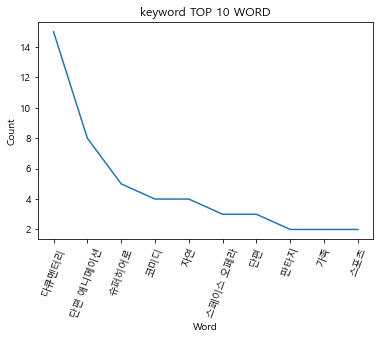

In [19]:
df_genres = disneyplus_df['GENRES']
tiving_text = get_nlkt_text(df_genres)
topWord = tiving_text.vocab().most_common(10) # top n word 
print(topWord)
make_top_word_graph(topWord)

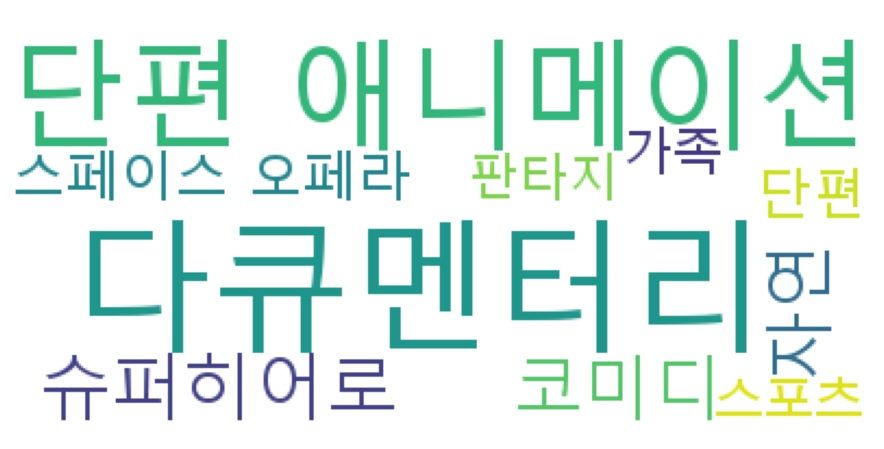

In [21]:
wordcloud_graph(topWord)

### OTT 플랫폼 4종에 대한 선호도 조사에 대한 기초 Data 
### 위에서 진행한 OTT프로그램에 대한 프로그램 유형 및 장르에 대한 반영  + 자료조사를 통한 플랫폼 이용 요금

In [4]:
ott_preference = pd.read_excel(r"D:\Python\TM\TeamProject/OTT프로그램정리.xlsx")
ott_type =  pd.read_excel(r"D:\Python\TM\TeamProject/OTT프로그램정리.xlsx",sheet_name = 'Meta_Data_1')
ott_genres = pd.read_excel(r"D:\Python\TM\TeamProject/OTT프로그램정리.xlsx",sheet_name = 'Meta_Data_2')
ott_chrge =  pd.read_excel(r"D:\Python\TM\TeamProject/OTT프로그램정리.xlsx",sheet_name = 'Meta_Data_3')

In [5]:
ott_preference

,OTT프로그램,TYPE,GENRES,MIN_CHARGE,TITLES
0,넷플릭스,"드라마, 영화,예능","판타지,스릴러,코미디,액션","0,5000,7000,11000,13000","오징어 게임, 지옥, 킹덤, 스위트홈, 라그라로크"
1,디즈니,"다큐, 애니메이션","다큐,애니메이션,히어로","0,9000","픽사,로키,호크아이,완다비전,픽사 팝콘"
2,왓챠,"드라마,영화,예능","로맨스,판타지,코미디,미스터리,예능","0,7000,11000","킬링 이브,체르노빌,오피스,무한도전,원피스"
3,티빙,"드라마, 실시간 서비스 이용,예능","로맨스,예능","0,5000,7000,9000,13000","스트릿 우먼 파이터, 해피니스, 지리산, 아는 형님, 놀라운 토요일"


In [6]:
ott_type

,TYPE_ID,TYPE
0,1,애니메이션
1,2,예능
2,3,드라마
3,4,다큐
4,5,실시간 시청 서비스 이용
5,6,영화


In [7]:
list(ott_preference["OTT프로그램"])

['넷플릭스', '디즈니', '왓챠', '티빙']

In [8]:
ott_genres

,GENRES_ID,GENRES
0,1,로맨스
1,2,판타지
2,3,스릴러
3,4,코미디
4,5,액션
5,6,미스터리
6,7,다큐
7,8,애니메이션
8,9,히어로
9,10,예능


In [9]:
ott_chrge

,CHARGE_ID,MIN_CHARGE,MAX_CHARGE
0,1,0,5000
1,2,5000,7000
2,3,7000,9000
3,4,9000,11000
4,5,11000,13000
5,6,13000,14500


### 설문조사 응답 결과에 대한 OTT 플랫폼 선호도 알고리즘

In [10]:
ott_answer = pd.read_excel(r"D:\Python\TM\TeamProject/OTT이용조사(응답).xlsx")

In [11]:
ott_answer

,USER_ID,사용유무,OTT플랫폼,프로그램유형,시청목록,선호콘텐츠,선호장르,요금
0,user_01,사용중,"넷플릭스, 왓챠","드라마, 영화",넷플릭스 지옥이요.,"지옥, 로키","스릴러, 코미디, 미스터리","9,000원 ~ 11,000원 미만"
1,user_02,사용중,"넷플릭스, 티빙, seezn","실시간 시청 서비스 이용, 예능, 드라마",술꾼도시여자들,"무한도전, 스트릿 우먼 파이터, 놀라운 토요일","코미디, 예능","5,000원 ~7,000원 미만"
2,user_03,사용중,"넷플릭스, 티빙, 디즈니, 웨이브, 쿠팡플레이","드라마, 영화, 실시간 시청 서비스 이용",디즈니플러스,"로키, 호크아이, 완다비전","코미디, 히어로","5,000원 ~7,000원 미만"
3,user_04,사용중,"넷플릭스, 티빙, 디즈니, 쿠팡플레이",영화,해피니스,"해피니스, 로키, 호크아이, 완다비전","판타지, 액션, 히어로","9,000원 ~ 11,000원 미만"
4,user_05,사용중,"넷플릭스, 왓챠, 쿠팡플레이","실시간 시청 서비스 이용, 애니메이션, 영화, 드라마","전생슬, 던만추","체르노빌, 원피스, 오징어게임, 지옥, 스위트홈","판타지, 액션, 애니메이션, 히어로","5,000원 미만"
5,user_06,사용중,넷플릭스,드라마,굿닥터,지리산,다큐,"5,000원 ~7,000원 미만"
6,user_07,사용중,넷플릭스,영화,"터닝포인트 911,그리고 테러와의 전쟁",킹덤,예능,"9,000원 ~ 11,000원 미만"
7,user_08,사용중,넷플릭스,예능,맛있는 녀석들,오징어게임,예능,"7,000원 ~ 9,000원 미만"
8,user_09,사용중,"넷플릭스, 티빙, 디즈니","영화, 예능, 드라마",슬기로운의사생활2,"무한도전, 아는형님, 픽사","스릴러, 코미디, 액션, 미스터리, 예능","11,000원~ 13,000원 미만"
9,user_10,사용중,왓챠,애니메이션,극주부도,픽사팝콘,"코미디, 애니메이션, 예능","5,000원 미만"


In [12]:
#요금 답변에 대한 최소금액 컬럼 추가 
ott_answer['최소요금']=''
for i,x in enumerate(ott_answer["요금"]) :
    ott_answer['최소요금'][i] = x.split('원')[0].replace(',','')

In [13]:
ott_answer_df =  ott_answer["USER_ID"]
ott_answer_df=pd.DataFrame(index =ott_answer["USER_ID"] , columns = ['넷플릭스','왓챠','티빙','디즈니'])

In [14]:
ott_answer_df=ott_answer_df.fillna(0)

In [15]:
ott_answer_df

,넷플릭스,왓챠,티빙,디즈니
USER_ID,,,,
user_01,0,0,0,0
user_02,0,0,0,0
user_03,0,0,0,0
user_04,0,0,0,0
user_05,0,0,0,0
user_06,0,0,0,0
user_07,0,0,0,0
user_08,0,0,0,0
user_09,0,0,0,0


In [16]:
#list 배열의 공백 제거 
def getStripList (list_arr) :
    return list(map(lambda x: x.strip() , list_arr ))

In [17]:
# 응답설문조사의 OTT플랫폼 별 선호도조사 
def getOttPreference(ott_row) :
    #step1. 사용 여부 확인 후 사용하는 OTT 프로그램의 선호도 +1
    # 질문 : 사용중인(사용예정) OTT플랫폼은 무엇인가요?
    if ott_row["사용유무"].strip() in ("사용중", "사용예정") :
        for x in (ott_row["OTT플랫폼"].split(',')) :
            if x.strip()  in list(ott_preference["OTT프로그램"]) :
                print( "사용우뮤",ott_row["USER_ID"])
                ott_answer_df.loc[ott_row["USER_ID"]][x.strip()] += 1                 
   
    
    for i, ott in enumerate(list (ott_preference["OTT프로그램"])) :
        #ott  =  넷플릭스, 왓차,티빙,디즈니
         #step2. 프로그램 유형에 따른 선호도 + 1
        # 질문 : 즐겨보는 프로그램 유형은 무엇인가요? 
        ott_type= ott_preference["TYPE"][i] #ex> ott_type = 드라마, 영화,예능         
        for x in getStripList (ott_type.split(',')) : # 넷플릭스의 프로그램 유형 (넷플리긋 - 드라마, 영화,예능 )
            row_movietype = getStripList(list(ott_row["프로그램유형"].split(',')))
            if x in row_movietype :
                print( "프로그램유형",ott_row["USER_ID"])
                ott_answer_df.loc[ott_row["USER_ID"]][ott] += 1
                
        #step3. 선호장르에 해당하는 OTT 플랫폼 선호도 +1
        #질문 : 선호하는 OTT콘텐츠 장르는 무엇인가요? 
        ott_genres= ott_preference["GENRES"][i] #ex> ott_type = 드라마, 영화,예능
        for x in getStripList(ott_genres.split(',')) :
            row_moviegenres = getStripList(list(ott_row["선호장르"].split(',')))
            if x in row_moviegenres :
                print( "선호장르",ott_row["USER_ID"])
                ott_answer_df.loc[ott_row["USER_ID"]][ott] += 1
                
        #step4. 선호콘텐츠에 해당하는 OTT 플랫폼 선호도+1
        #질문 : 보고 싶은 프로그램이 있다면?
        ott_titles= ott_preference["TITLES"][i] #ex> ott_type = 드라마, 영화,예능
        for x in getStripList(ott_titles.split(',')) :
            row_movies = getStripList(list(ott_row["선호콘텐츠"].split(',')))
            if x in row_movies :
                print( "선호콘텐츠",ott_row["USER_ID"])
                ott_answer_df.loc[ott_row["USER_ID"]][ott] += 1
        
        #step5. 이용 요금에 대한 해당하는 OTT플랫폼 선호도 + 1
        #질문 : OTT플랫폼 이용 요금으로 적당하다고 생각하는 금액은 얼마인가요? 
        ott_chrge= ott_preference["MIN_CHARGE"][i] #ex> ott_type = 드라마, 영화,예능
        for x in getStripList(ott_chrge.split(',')) :
            if ott_row["최소요금"] in x :
                print( "최소요금",ott_row["USER_ID"])
                ott_answer_df.loc[ott_row["USER_ID"]][ott] += 1
        

In [18]:
for idx, row in ott_answer.iterrows():
    getOttPreference(row)      

사용우뮤 user_01
사용우뮤 user_01
프로그램유형 user_01
프로그램유형 user_01
선호장르 user_01
선호장르 user_01
선호콘텐츠 user_01
선호콘텐츠 user_01
최소요금 user_01
프로그램유형 user_01
프로그램유형 user_01
선호장르 user_01
선호장르 user_01
프로그램유형 user_01
최소요금 user_01
사용우뮤 user_02
사용우뮤 user_02
프로그램유형 user_02
프로그램유형 user_02
선호장르 user_02
최소요금 user_02
프로그램유형 user_02
프로그램유형 user_02
선호장르 user_02
선호장르 user_02
선호콘텐츠 user_02
프로그램유형 user_02
프로그램유형 user_02
선호장르 user_02
선호콘텐츠 user_02
선호콘텐츠 user_02
최소요금 user_02
사용우뮤 user_03
사용우뮤 user_03
사용우뮤 user_03
프로그램유형 user_03
프로그램유형 user_03
선호장르 user_03
최소요금 user_03
선호장르 user_03
선호콘텐츠 user_03
선호콘텐츠 user_03
선호콘텐츠 user_03
프로그램유형 user_03
프로그램유형 user_03
선호장르 user_03
프로그램유형 user_03
최소요금 user_03
사용우뮤 user_04
사용우뮤 user_04
사용우뮤 user_04
프로그램유형 user_04
선호장르 user_04
선호장르 user_04
선호장르 user_04
선호콘텐츠 user_04
선호콘텐츠 user_04
선호콘텐츠 user_04
최소요금 user_04
프로그램유형 user_04
선호장르 user_04
선호콘텐츠 user_04
최소요금 user_04
사용우뮤 user_05
사용우뮤 user_05
프로그램유형 user_05
프로그램유형 user_05
선호장르 user_05
선호장르 user_05
선호콘텐츠 user_05
선호콘텐츠 user_05
최소요금 user_05
프로그램유형 use

In [19]:
ott_answer_df

,넷플릭스,왓챠,티빙,디즈니
USER_ID,,,,
user_01,6,5,2,2
user_02,5,5,7,0
user_03,5,3,3,5
user_04,4,2,3,6
user_05,8,6,2,3
user_06,3,1,3,1
user_07,3,2,2,1
user_08,3,3,3,0
user_09,8,8,4,2


In [20]:
# 각 user별 높은 콘텐츠만 뽑읍(같은 점수의 콘텐츠도 동일하게 추출)
ott_answer_df["OTT_LIST"] = ott_answer_df.apply(lambda s: s.nlargest(1,keep='all').index.tolist(), axis=1) 

In [21]:
## 두개의 dataFrame 합침
ott_answer_df = ott_answer_df.merge( ott_answer, on ='USER_ID',how='left')

In [22]:
ott_answer_df=ott_answer_df.reset_index()

### 설문조사 응답의 결과에 대해서 내부적 알고리즘을 통하여 사용자에게 맞는 OTT플랫폼 1차 추출
1. 동일 점수의 OTT플랫폼이 모두 추출되도록 설정
2. ott_survey 파일에 저장

In [25]:
ott_answer_df

,index,USER_ID,넷플릭스,왓챠,티빙,디즈니,OTT_LIST,사용유무,OTT플랫폼,프로그램유형,시청목록,선호콘텐츠,선호장르,요금,최소요금
0,0,user_01,6,5,2,2,[넷플릭스],사용중,"넷플릭스, 왓챠","드라마, 영화",넷플릭스 지옥이요.,"지옥, 로키","스릴러, 코미디, 미스터리","9,000원 ~ 11,000원 미만",9000
1,1,user_02,5,5,7,0,[티빙],사용중,"넷플릭스, 티빙, seezn","실시간 시청 서비스 이용, 예능, 드라마",술꾼도시여자들,"무한도전, 스트릿 우먼 파이터, 놀라운 토요일","코미디, 예능","5,000원 ~7,000원 미만",5000
2,2,user_03,5,3,3,5,"[넷플릭스, 디즈니]",사용중,"넷플릭스, 티빙, 디즈니, 웨이브, 쿠팡플레이","드라마, 영화, 실시간 시청 서비스 이용",디즈니플러스,"로키, 호크아이, 완다비전","코미디, 히어로","5,000원 ~7,000원 미만",5000
3,3,user_04,4,2,3,6,[디즈니],사용중,"넷플릭스, 티빙, 디즈니, 쿠팡플레이",영화,해피니스,"해피니스, 로키, 호크아이, 완다비전","판타지, 액션, 히어로","9,000원 ~ 11,000원 미만",9000
4,4,user_05,8,6,2,3,[넷플릭스],사용중,"넷플릭스, 왓챠, 쿠팡플레이","실시간 시청 서비스 이용, 애니메이션, 영화, 드라마","전생슬, 던만추","체르노빌, 원피스, 오징어게임, 지옥, 스위트홈","판타지, 액션, 애니메이션, 히어로","5,000원 미만",5000
5,5,user_06,3,1,3,1,"[넷플릭스, 티빙]",사용중,넷플릭스,드라마,굿닥터,지리산,다큐,"5,000원 ~7,000원 미만",5000
6,6,user_07,3,2,2,1,[넷플릭스],사용중,넷플릭스,영화,"터닝포인트 911,그리고 테러와의 전쟁",킹덤,예능,"9,000원 ~ 11,000원 미만",9000
7,7,user_08,3,3,3,0,"[넷플릭스, 왓챠, 티빙]",사용중,넷플릭스,예능,맛있는 녀석들,오징어게임,예능,"7,000원 ~ 9,000원 미만",7000
8,8,user_09,8,8,4,2,"[넷플릭스, 왓챠]",사용중,"넷플릭스, 티빙, 디즈니","영화, 예능, 드라마",슬기로운의사생활2,"무한도전, 아는형님, 픽사","스릴러, 코미디, 액션, 미스터리, 예능","11,000원~ 13,000원 미만",11000
9,9,user_10,2,3,2,2,[왓챠],사용중,왓챠,애니메이션,극주부도,픽사팝콘,"코미디, 애니메이션, 예능","5,000원 미만",5000


In [26]:
ott_answer_df.to_excel(r"D:\Python\TM\TeamProject/ott_survey.xlsx")